Cell 1: Imports and Setup
Notes:

Import essential libraries for file operations, image processing, visualization, and randomness.

These libraries will be used to load, inspect, and manipulate fetal ultrasound images and masks.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random


Cell 2: Dataset Inspection and Sample Visualization
Notes:

Load the list of image files from the dataset directory.

Print the total number of images to confirm dataset size.

Check the image shapes of a sample subset to understand size variations.

Visualize a grid of random image samples with their corresponding masks overlayed.

Helps verify data integrity, correspondence, and quality before preprocessing.



Total images: 999
Distinct image shapes in first 50 images: {(540, 800)}


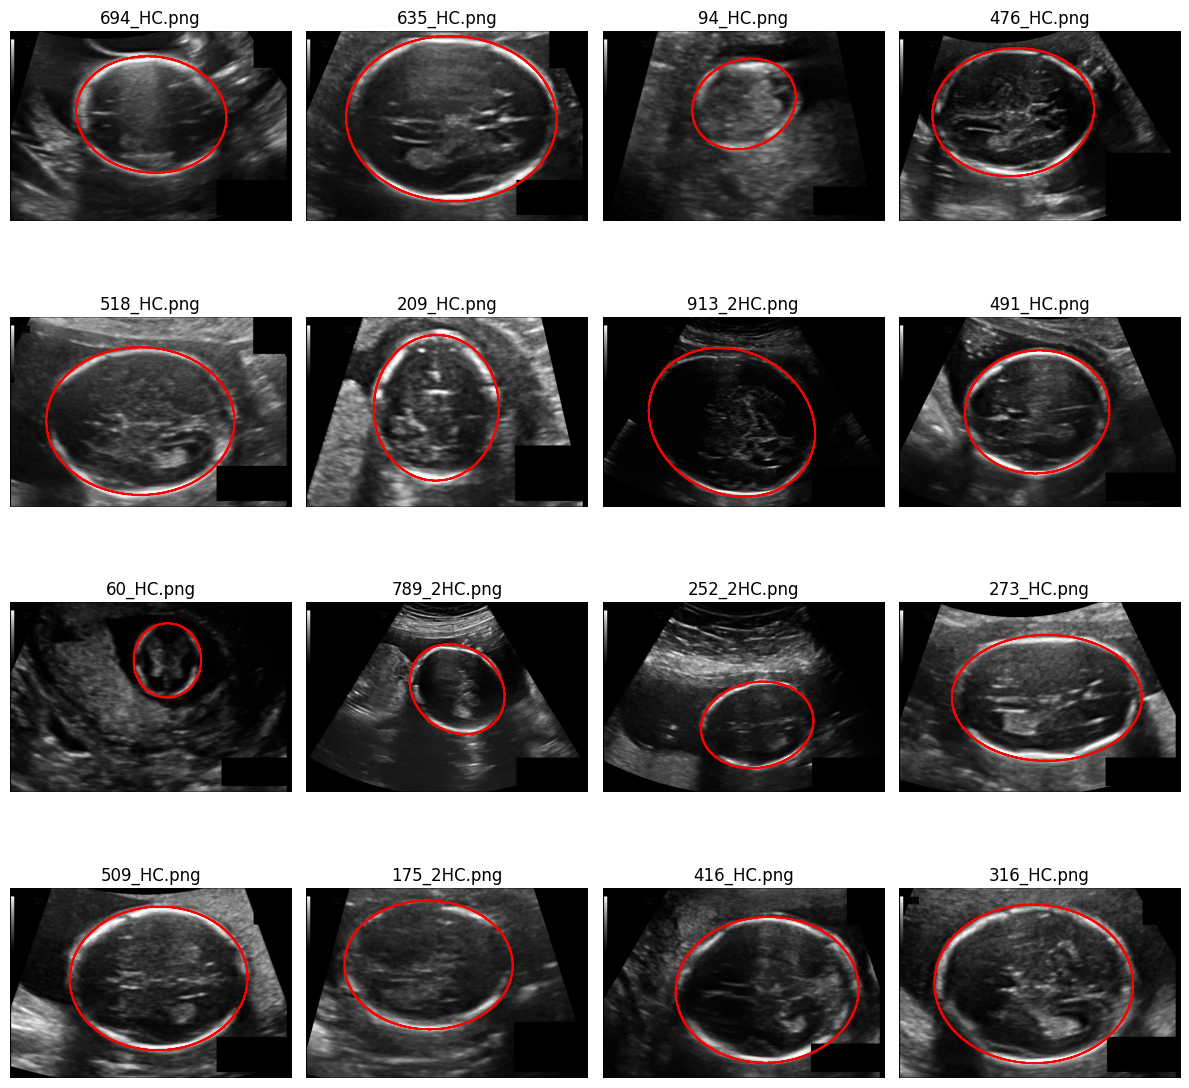

In [5]:
image_dir = '../data/train/images'
mask_dir = '../data/train/masks'


image_files = sorted(os.listdir(image_dir))
print(f"Total images: {len(image_files)}")

# Check image sizes
sizes = []
for fname in image_files[:50]:  # Check first 50 images
    img_path = os.path.join(image_dir, fname)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sizes.append(img.shape)

print("Distinct image shapes in first 50 images:", set(sizes))

# Visualize some samples
fig, axs = plt.subplots(4, 4, figsize=(12,12))
for i, fname in enumerate(random.sample(image_files, 16)):
    img = cv2.imread(os.path.join(image_dir, fname), cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(os.path.join(mask_dir, fname), cv2.IMREAD_GRAYSCALE)

    ax = axs[i//4, i%4]
    ax.imshow(img, cmap='gray')
    ax.contour(mask, colors='r', linewidths=0.5)
    ax.set_title(fname)
    ax.axis('off')

plt.tight_layout()
plt.show()


Cell 3: Preprocessing Images and Masks
Notes:

Define the target size (e.g., 256x256) for resizing all images and masks to a uniform dimension.

Read, resize, and normalize all images and masks, converting pixel values to standard ranges.

Save the preprocessed images and masks to new directories for consistent later use in training.

Ensures neural network input compatibility and faster model convergence.

In [6]:
# Create output directories
output_img_dir = 'data/preprocessed/train/images'
output_mask_dir = 'data/preprocessed/train/masks'
os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

target_size = (256, 256)

for fname in image_files:
    # Read image and mask
    img = cv2.imread(os.path.join(image_dir, fname), cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(os.path.join(mask_dir, fname), cv2.IMREAD_GRAYSCALE)

    # Resize
    img_resized = cv2.resize(img, target_size)
    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)

    # Normalize image pixels to [0, 1] float32 before saving as uint8 (optional)
    # Here we save as uint8 to keep standard PNG, normalization can be done during training
    cv2.imwrite(os.path.join(output_img_dir, fname), img_resized)
    cv2.imwrite(os.path.join(output_mask_dir, fname), mask_resized)

print("Image preprocessing and resizing complete.")


Image preprocessing and resizing complete.
